In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
task_set=[]
with open('task_set.txt', 'r') as file:
    for line in file:
        line = line.strip()
        if line.startswith('['):
            line = line[1:]
        if line.endswith(']'):
            line = line[:-1]
        values = line.split(',')
        task_set.append([values[1][2:len(values[1])-1],float(values[2]),float(values[3]),int(values[4]),int(values[5])])
print(task_set)

[['T1', 0.0, 3.0, 20, 20], ['T2', 0.0, 2.0, 5, 5], ['T3', 0.0, 2.0, 10, 20]]


In [52]:
def schedulability(task_set):
    util=0
    n = len(task_set)
    ualg=n*(2**(1/n)-1)
    for task in task_set:
        util+=(task[2]/min(task[3],task[4]))
    return ualg>util

In [53]:
import math

def hyperperiod(periods):
    lcm_ = periods[0]
    for i in range(1, len(periods)):
        lcm_ = math.lcm(lcm_, periods[i])
    return lcm_

In [54]:
import pandas as pd

df=pd.DataFrame(task_set,columns=["Task","release_time","ex_time","period","Deadline"])
df

,Task,release_time,ex_time,period,Deadline
0,T1,0.0,3.0,20,20
1,T2,0.0,2.0,5,5
2,T3,0.0,2.0,10,20


In [55]:
df['time_left'] = df['ex_time']
df

,Task,release_time,ex_time,period,Deadline,time_left
0,T1,0.0,3.0,20,20,3.0
1,T2,0.0,2.0,5,5,2.0
2,T3,0.0,2.0,10,20,2.0


In [56]:
RMS=[]

In [57]:
if schedulability(task_set):
    for i in range(hyperperiod(df.period)):
        rem=df[df["release_time"]<=i]
        rem=rem[rem["time_left"]>0]
        if len(rem)>0:
            s_task=rem.sort_values('period').index[0]
            df.loc[s_task,"time_left"]=df.loc[s_task]["time_left"]-1.0
            if i>0 and RMS[-1]['Task']==df.loc[s_task]["Task"] and RMS[-1]['end']==i :
                RMS[-1].update({'end':i+1,'length':RMS[-1]['length']+1})
            else:
                RMS += [{'Task': df.loc[s_task]["Task"],'start': i,'end': i+1,'length': 1}]
        arrived=df[(i+1)%df['period']==0].index
        df.loc[arrived, 'time_left'] = df.loc[arrived, 'ex_time']
else:
    print("Not Schedulabe using RMA!! :/")

In [58]:
RMS

[{'Task': 'T2', 'start': 0, 'end': 2, 'length': 2},
 {'Task': 'T3', 'start': 2, 'end': 4, 'length': 2},
 {'Task': 'T1', 'start': 4, 'end': 5, 'length': 1},
 {'Task': 'T2', 'start': 5, 'end': 7, 'length': 2},
 {'Task': 'T1', 'start': 7, 'end': 9, 'length': 2},
 {'Task': 'T2', 'start': 10, 'end': 12, 'length': 2},
 {'Task': 'T3', 'start': 12, 'end': 14, 'length': 2},
 {'Task': 'T2', 'start': 15, 'end': 17, 'length': 2}]

In [59]:
RMS=pd.DataFrame(RMS)

In [60]:
if schedulability(task_set): 
    print("Yaay!!  Schedulabe using RMA :)")
    print("------------------------------------------------------------------------------")

Yaay!!  Schedulabe using RMA :)
------------------------------------------------------------------------------


In [61]:
RMS

,Task,start,end,length
0,T2,0,2,2
1,T3,2,4,2
2,T1,4,5,1
3,T2,5,7,2
4,T1,7,9,2
5,T2,10,12,2
6,T3,12,14,2
7,T2,15,17,2


In [64]:
start = RMS.start
Task=df.Task.values.tolist()
Task

['T1', 'T2', 'T3']

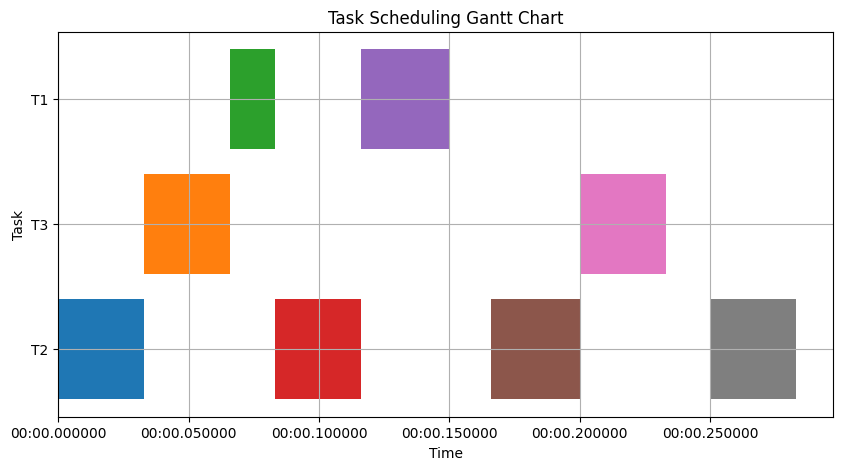

In [98]:
RMS['start'] = pd.to_datetime(RMS['start'], unit='ms')
RMS['end'] = pd.to_datetime(RMS['end'], unit='ms')

# Plotting the Gantt chart
fig, ax = plt.subplots(figsize=(10, 5))

for i, task in enumerate(RMS['Task']):
    ax.barh(task, width=(RMS['end'][i] - RMS['start'][i]), left=RMS['start'][i])

ax.set_xlabel('Time')
ax.set_ylabel('Task')
ax.set_title('Task Scheduling Gantt Chart')

plt.grid(True)
plt.show()